In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

/tf/maskrcnn-benchmark


In [10]:
%cd /tf/maskrcnn-benchmark/my_dataset
image_directory = './train/images/'
annotation_file = './train/annotation.json'

example_coco = COCO(annotation_file)

categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

/tf/maskrcnn-benchmark/my_dataset
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Custom COCO categories: 
Rectangle Text Background

Custom COCO supercategories: 
shape


{'id': 2, 'file_name': '2.png', 'width': 256, 'height': 256, 'date_captured': '2019-09-27 12:42:34.969919', 'license': 1, 'coco_url': '', 'flickr_url': ''}


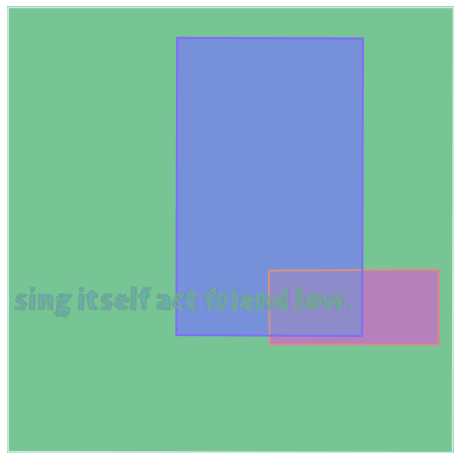

In [16]:
category_ids = example_coco.getCatIds(catNms=['rectangle'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
print(image_data)

image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)